In [2]:
from time import time
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import LSTM
from keras.callbacks import TensorBoard
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.
/home/geanderson/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [30]:
model = Sequential()
model.add(Dense(24, activation='relu', input_dim=14))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])






In [3]:
df = pd.read_csv('day.csv')

In [17]:
df = df.drop(['dteday'], axis=1)

In [18]:
y = np.asarray(df[['instant']])
X = np.asarray(df.loc[:, df.columns != 'instant'])

In [19]:
y.shape

(731, 1)

In [20]:
X.shape

(731, 14)

In [22]:
tensorboard = TensorBoard(log_dir='./Dropbox/DATA SCIENCE PYTHON/Deep Learning/MODELS/logs/')

In [31]:
# Train the model, iterating on the data in batches of 32 samples
history = model.fit(X, y, epochs=18, batch_size=32, callbacks=[tensorboard])

Epoch 1/18
731/731 [==============================] - 0s 129us/step - loss: -5808.7936 - acc: 0.0014
Epoch 2/18
731/731 [==============================] - 0s 100us/step - loss: -5809.9442 - acc: 0.0014
Epoch 3/18
731/731 [==============================] - 0s 90us/step - loss: -5810.7917 - acc: 0.0014
Epoch 4/18
731/731 [==============================] - 0s 94us/step - loss: -5811.8673 - acc: 0.0014
Epoch 5/18
731/731 [==============================] - 0s 81us/step - loss: -5812.9684 - acc: 0.0014
Epoch 6/18
731/731 [==============================] - 0s 90us/step - loss: -5814.0700 - acc: 0.0014
Epoch 7/18
731/731 [==============================] - 0s 74us/step - loss: -5814.9607 - acc: 0.0014
Epoch 8/18
731/731 [==============================] - 0s 87us/step - loss: -5815.9975 - acc: 0.0014
Epoch 9/18
731/731 [==============================] - 0s 101us/step - loss: -5817.0731 - acc: 0.0014
Epoch 10/18
731/731 [==============================] - 0s 107us/step - loss: -5817.9680 - acc: 0.

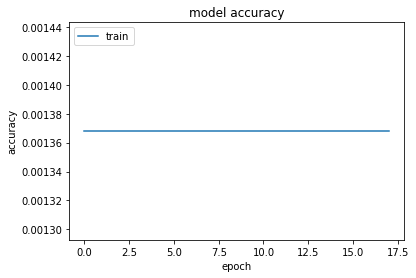

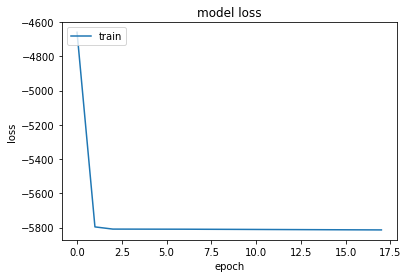

In [24]:

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()